<a href="https://colab.research.google.com/github/VieiraEduardo/An-lise-explor-toria-de-dados-completo/blob/main/2_Remo%C3%A7%C3%A3o_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import os as os
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

2. Carregar o dataset do titanic

In [ ]:
#Carregar fataset titanic
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

In [ ]:
#Visualizar os nomes das colunas
print("Nome das coluanas")
print(df.columns)

Nome das coluanas
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
#Resumo das colunas
print("Resumo das colunas")
print(df.info())

Resumo das colunas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
#Descrição das colunas
coluna_descricao = {
    'PassengerId': 'Identificador único do passageiro',
    'Survived': 'Indica se o passageiro sobreviveu (1) ou não (0)',
    'Pclass': 'Classe do passageiro (1, 2 ou 3)',
    'Name': 'Nome do passageiro',
    'Sex': 'Sexo do passageiro (male/female)',
    'Age': 'Idade do passageiro',
    'SibSp': 'Número de irmãos/cônjuges a bordo',
    'Parch': 'Número de pais/filhos a bordo',
    'Ticket': 'Número do ticket',
    'Fare': 'Tarifa paga pelo passageiro',
    'Cabin': 'Número da cabine do passageiro',
    'Embarked': 'Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)'
}

#imprimir a descrição das colunas
print("Descrição das colunas")
for coluna, descricao in coluna_descricao.items():
    print(f"{coluna}: {descricao}")

Descrição das colunas
PassengerId: Identificador único do passageiro
Survived: Indica se o passageiro sobreviveu (1) ou não (0)
Pclass: Classe do passageiro (1, 2 ou 3)
Name: Nome do passageiro
Sex: Sexo do passageiro (male/female)
Age: Idade do passageiro
SibSp: Número de irmãos/cônjuges a bordo
Parch: Número de pais/filhos a bordo
Ticket: Número do ticket
Fare: Tarifa paga pelo passageiro
Cabin: Número da cabine do passageiro
Embarked: Porto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)


In [ ]:
#Imprimir as primeiras linhas do dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


3. Expotar o arquivo imputado para uma pasta local

In [ ]:
#Salvar o dataframe como um arquivo local
df.to_csv('titanic.csv', index=False)

In [ ]:
#Baixar o arquivo CSV
files.download('titanic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4. Pre processamento dos dados

É importante tratar os dados antes de aplicar o Isolation Forest. Vamos preenhcer valores ausentes e selcionar algumas colunas numéricas.


In [ ]:
#Visualizar os valores ausentes
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
#Seleciona colunas numéricas para detectar outliers
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
df_numerical = df[numerical_features]

In [ ]:
#Inicializar o modelo Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)

In [ ]:
#Import simpleimputer to handle missing values
from sklearn.impute import SimpleImputer

In [ ]:
#Create an Imputer to fill missing values with  the median
imputer = SimpleImputer(strategy='median')

5. Processamento do modelo

In [ ]:
#fit the imputer to your numerical data and tranform it
df_numerical_imputed = imputer.fit_transform(df_numerical)

In [ ]:
#Ajustar o modelo aos dados numéricos ( após preenchimento dos valores ausentes )
model.fit(df_numerical_imputed)

IsolationForest(contamination=0.05, random_state=42)

In [ ]:
#Predição de Outliers
df['Outlier'] = model.predict(df_numerical_imputed)

In [ ]:
#Add de prediction as a new column to your original Dataframe
Outlier_predictions = df['Outlier']

In [ ]:
#Display the rows where Outliers were (outliers_predictions == -1)
print(df[Outlier_predictions == -1])

     PassengerId  Survived  Pclass  \
13            14         0       3   
25            26         1       3   
27            28         0       1   
59            60         0       3   
68            69         1       3   
71            72         0       3   
88            89         1       1   
118          119         0       1   
159          160         0       3   
164          165         0       3   
167          168         0       3   
180          181         0       3   
201          202         0       3   
258          259         1       1   
268          269         1       1   
297          298         0       1   
299          300         1       1   
305          306         1       1   
311          312         1       1   
324          325         0       3   
341          342         1       1   
360          361         0       3   
377          378         0       1   
386          387         0       3   
438          439         0       1   
480         

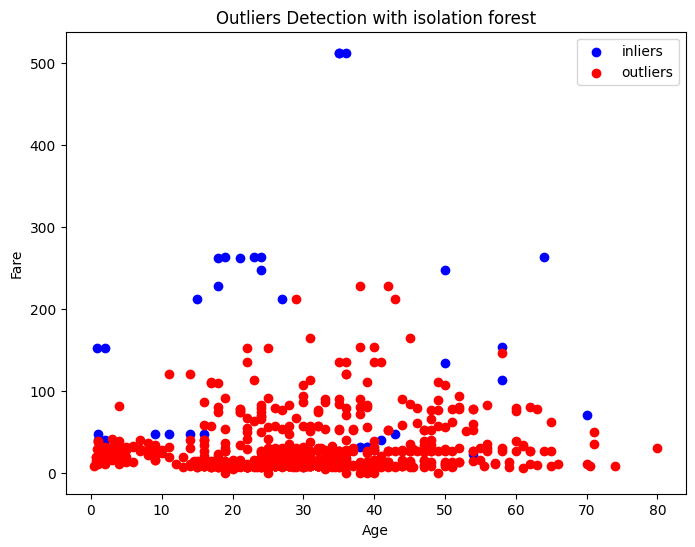

In [ ]:
#Choose two numerical features to plot ( adjust as needed)
feature1 = "Age"
feature2 = "Fare"

#Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[feature1] [df["Outlier"] == -1],
            df[feature2] [df["Outlier"] == -1],
            c="blue", label="inliers")
plt.scatter(df[feature1] [df["Outlier"] == 1],
            df[feature2] [df["Outlier"] == 1],
            c="red", label="outliers")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Outliers Detection with isolation forest")
plt.legend()
plt.show()

In [ ]:
#Ctiar um DataFrame sem os outlliers
df_no_outliers = df[df["Outlier"] == 1]

In [ ]:
#Optionally, reset the index of the new DataFrame
df_no_outliers = df_no_outliers.reset_index(drop=True)

print(df_no_outliers.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  outlier  Outlier  
0      0         A/5 21171   7.2500   NaN        S        1        1  
1      0          PC 17599  71.2833   C85        C        1        1  
2      0  STON/O2. 3101282   7.9250   NaN        S        1        1  
3      0            113803  53.1000 

6.Exportar o arquivo sem outliers para uma pasya local

In [ ]:
#Salva o dataframe como um arquivo CSV
df_no_outliers.to_csv('titanic_no_outliers.csv', index=False)

In [ ]:
#Baixar o arquivo CSV
files.download('titanic_no_outliers.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>